<a href="https://colab.research.google.com/github/smriti-nayak/Analysing-Mental-Health-during-COVID/blob/main/PreCovid_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading and Exploring the Dataset

In [ ]:
import pandas as pd
file = '/content/drive/My Drive/Datasets/Pre Covid Mini.csv'

data = pd.read_csv(file)

# dropping null value columns to avoid errors 
data.dropna(inplace = True) 

data.head(15)

,tweets,labels
0,"Check out 'Cinema Bizarre - Melbourne, VIC' at...",0
1,goodnight &amp; this one is final.,0
2,What a lovely Saturday morning! I love winter,0
3,More than 1 in 20 US children and teens have a...,1
4,@mannykimchi technically first college year......,0
5,@ksprior post something moron,0
6,"the end of 2014 - 2016 , was my worst yrs <Emo...",1
7,@GentlemanJervis Small question. Are you alrea...,1
8,just voted GREEN party! just hope it's enoug...,0
9,@okto the brides mom was so cute. She asked me...,0


In [ ]:
data.tweets[:15]

0     Check out 'Cinema Bizarre - Melbourne, VIC' at...
1                   goodnight  &amp; this one is final.
2        What a lovely Saturday morning! I love winter 
3     More than 1 in 20 US children and teens have a...
4     @mannykimchi technically first college year......
5                        @ksprior post something moron 
6     the end of 2014 - 2016 , was my worst yrs <Emo...
7     @GentlemanJervis Small question. Are you alrea...
8     just voted  GREEN party!  just hope it's enoug...
9     @okto the brides mom was so cute. She asked me...
10    you can cure bipolar depression by eating frui...
11                                   Making a present! 
12      @PunishedBox No. I went straight to depression.
13    @fanxyncity his feet look like they have depre...
14    @amarita77 goodmorning, that is good to hear  ...
Name: tweets, dtype: object

In [ ]:
print(data.tweets[11])

Making a present! 


In [ ]:
data.shape

(501, 2)

### 2. Preprocessing the Data

*   Lowercasing
*   Removal of non-alphabetical characters
*   Tokenization
*   Stop-word removal
*   Stemming

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop = stopwords.words('english')
punc = string.punctuation
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'bef

In [ ]:
# Lowercasing
data['tweets'] = data['tweets'].str.lower()

print(data.tweets[11])

making a present! 


In [ ]:
# Removing non-alphabetic characters
data['tweets'] = data['tweets'].str.replace('[^a-z\s]', '')

print(data.tweets[11])

making a present 


In [ ]:
# Tokennization
data['tweets'] = data['tweets'].apply(word_tokenize)

print(data.tweets[11])

['making', 'a', 'present']


In [ ]:
# Removing stopwords and Stemming

stemmer = PorterStemmer()

def clean(df):
  clean_tokens = []
  for word in df:
    if(word not in stop and word not in punc):
      clean_tokens.append(stemmer.stem(word))
  return clean_tokens

data['tweets'] = data['tweets'].apply(clean)

In [ ]:
print(data.tweets[11])

['make', 'present']


In [ ]:
data.head(15)

,tweets,labels
0,"[check, cinema, bizarr, melbourn, vic, eventfu...",0
1,"[goodnight, amp, one, final]",0
2,"[love, saturday, morn, love, winter]",0
3,"[us, children, teen, anxieti, depress, httpsgo...",1
4,"[mannykimchi, technic, first, colleg, yearcaus...",0
5,"[ksprior, post, someth, moron]",0
6,"[end, worst, yr, emoji, face, tear, joy, reall...",1
7,"[gentlemanjervi, small, question, alreadi, get...",1
8,"[vote, green, parti, hope, enough, keep, evil,...",0
9,"[okto, bride, mom, cute, ask, much, film, woul...",0


### 3. Analysis of Data (Word Frequency Distribution Analysis)

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist()
for doc in data.tweets:
  for word in doc:
    fdist[word] +=1

In [ ]:
vocab = fdist.most_common(50)
print(vocab)

[('depress', 204), ('im', 49), ('get', 37), ('go', 34), ('love', 29), ('anxieti', 29), ('good', 29), ('time', 28), ('hope', 26), ('make', 26), ('like', 26), ('one', 23), ('u', 23), ('watch', 23), ('emoji', 22), ('dont', 22), ('know', 20), ('feel', 20), ('day', 20), ('lol', 19), ('think', 19), ('need', 19), ('thank', 18), ('eat', 17), ('see', 17), ('help', 16), ('peopl', 16), ('back', 16), ('today', 15), ('well', 15), ('talk', 15), ('fun', 14), ('night', 14), ('want', 14), ('cant', 14), ('thing', 14), ('work', 14), ('great', 14), ('ill', 14), ('us', 13), ('face', 13), ('new', 13), ('life', 13), ('got', 13), ('amp', 12), ('realli', 12), ('look', 12), ('everyon', 12), ('na', 12), ('use', 12)]


In [ ]:
# Storing the most common 50 words in a list

lst = [tup[0] for tup in vocab]
print(lst)

['depress', 'im', 'get', 'go', 'love', 'anxieti', 'good', 'time', 'hope', 'make', 'like', 'one', 'u', 'watch', 'emoji', 'dont', 'know', 'feel', 'day', 'lol', 'think', 'need', 'thank', 'eat', 'see', 'help', 'peopl', 'back', 'today', 'well', 'talk', 'fun', 'night', 'want', 'cant', 'thing', 'work', 'great', 'ill', 'us', 'face', 'new', 'life', 'got', 'amp', 'realli', 'look', 'everyon', 'na', 'use']


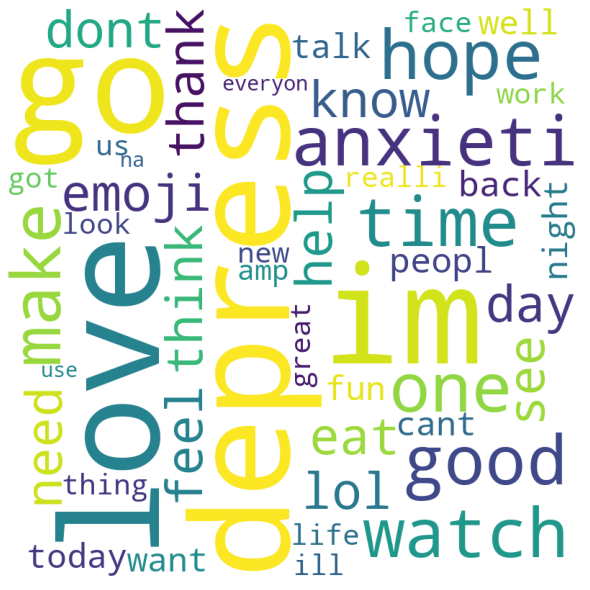

In [ ]:
#Generate WordCloud of the 50 most frequent 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words=""
for word in lst:
  words = words+" "+word
#print(words)
wcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
with open('nlargest.txt', 'w') as f:
  for item in lst:
    f.write("%s\n" % item)

### 4. Feature Preparation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
#Preparing data to create TF-IDF features

d = data.tweets
merged = []
for doc in d:
  merged.append((' '.join(doc)))

data.tweets = merged
data.head(15)

,tweets,labels
0,check cinema bizarr melbourn vic eventfulcom h...,0
1,goodnight amp one final,0
2,love saturday morn love winter,0
3,us children teen anxieti depress httpsgooglenr,1
4,mannykimchi technic first colleg yearcaus im s...,0
5,ksprior post someth moron,0
6,end worst yr emoji face tear joy realli depress,1
7,gentlemanjervi small question alreadi get medi...,1
8,vote green parti hope enough keep evil bnp,0
9,okto bride mom cute ask much film would cost s...,0


In [ ]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer()),
    ('classifier',MultinomialNB()),
])

### 5. Training the DataSet
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.tweets, data.labels, test_size=0.20, random_state=42)

In [ ]:
print(x_train.shape)

(400,)


In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
preds = pipeline.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
print("Acccuracy: "+ str(accuracy_score(y_test, preds)))
print("F1 Score: "+ str(f1_score(y_test, preds)))
print("Recall: "+ str(recall_score(y_test, preds)))


Acccuracy: 0.8910891089108911
F1 Score: 0.8952380952380952
Recall: 0.9215686274509803
